In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

from kdelearn.kde import KDE
from kdelearn.kde_funcs import KDEOutliersDetector
from kdelearn.bandwidth_selection import normal_reference, direct_plugin

from sklearn.neighbors import NearestNeighbors

Przy

a=0.00, 0.01, 0.02, 0.03, ... , 0.50

r=0.01, 0.015, 0.02, 0.025, ... , 0.2

k=2, 5, 10, 20, 50, 100, 200, 500

In [2]:
def func(x_train, dist_k):
    bandwidth = direct_plugin(x_train, stage=2)
    kde = KDE().fit(x_train, bandwidth=bandwidth)
    scores = kde.pdf(x_train)

    metrics_list = []
    r_list = []
    for r in np.arange(0.01, 0.205, 0.005):
        r = round(r, 3)
        
        # knn
        threshold = np.quantile(dist_k, 1 - r)
        labels_pred = np.where(dist_k >= threshold, 1 ,0)

        n_outliers = labels_pred.sum()
        if n_outliers == 0:
            continue

        scores_o = scores[labels_pred==1]
        scores_i = scores[labels_pred==0]
        metrics = np.sum(scores_o) / np.sum(np.sort(scores_i)[:n_outliers])

        metrics_list.append(metrics)
        r_list.append(r)

    # Find minima
    idx = np.argmin(metrics_list)
    global_min = (metrics_list[idx], r_list[idx])
    
    return global_min

\newpage

a: 0.0, k: 20, r: 0.2


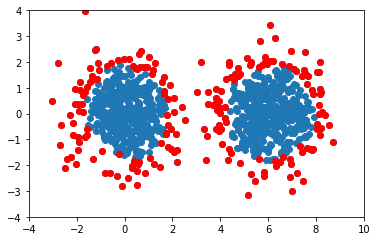

----------
a: 0.01, k: 10, r: 0.05


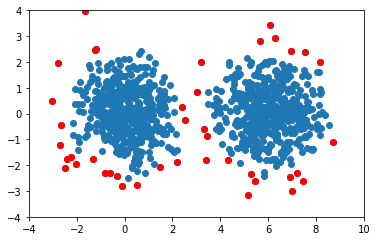

----------
----------
a: 0.02, k: 10, r: 0.06


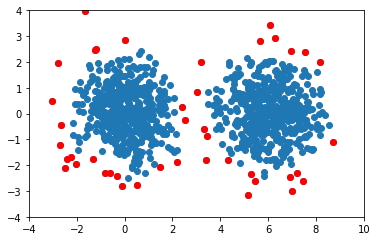

----------
a: 0.03, k: 50, r: 0.055


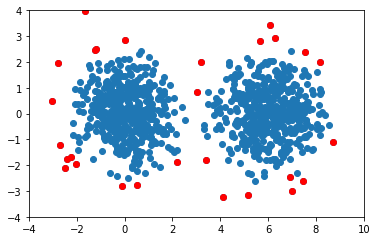

----------
----------
a: 0.04, k: 5, r: 0.05


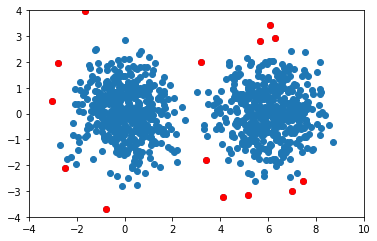

----------
a: 0.05, k: 5, r: 0.07


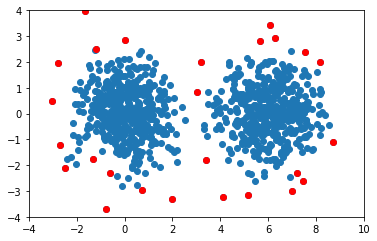

----------
----------
a: 0.06, k: 5, r: 0.08


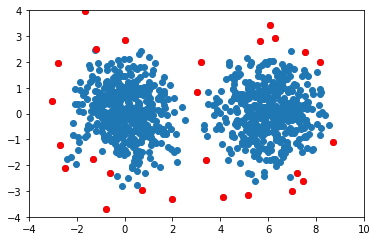

----------
a: 0.07, k: 20, r: 0.09


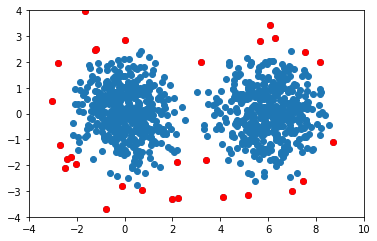

----------
----------
a: 0.08, k: 20, r: 0.1


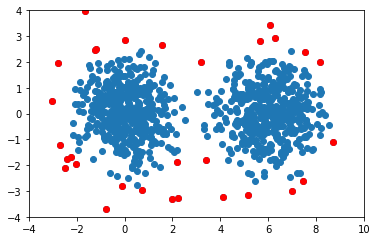

----------
a: 0.09, k: 10, r: 0.1


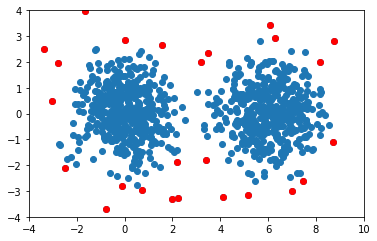

----------
----------
a: 0.1, k: 10, r: 0.11


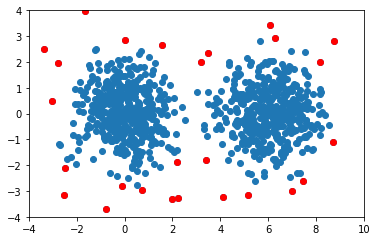

----------
a: 0.11, k: 10, r: 0.115


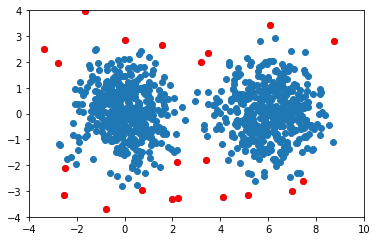

----------
----------
a: 0.12, k: 10, r: 0.125


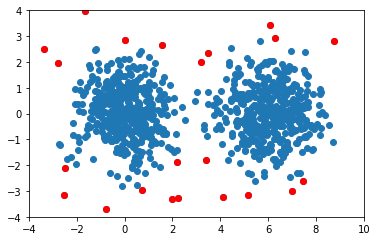

----------
a: 0.13, k: 10, r: 0.135


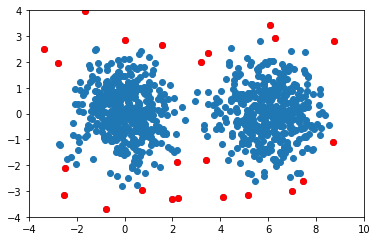

----------
----------
a: 0.14, k: 10, r: 0.145


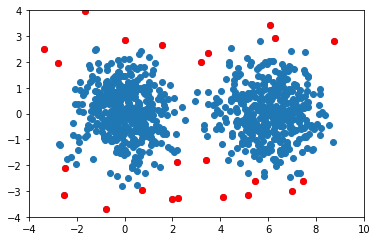

----------
a: 0.15, k: 10, r: 0.15


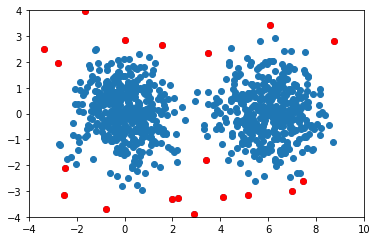

----------
----------
a: 0.16, k: 10, r: 0.165


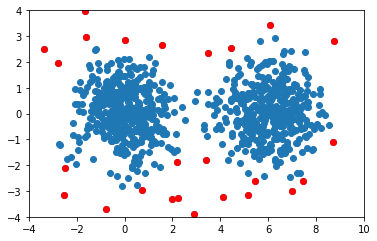

----------
a: 0.17, k: 10, r: 0.175


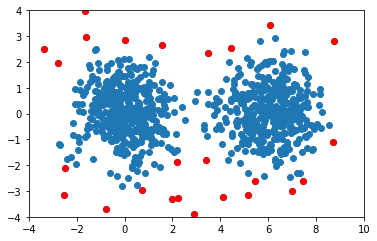

----------
----------
a: 0.18, k: 10, r: 0.185


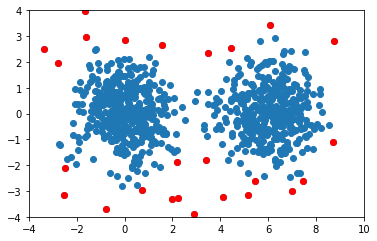

----------
a: 0.19, k: 10, r: 0.19


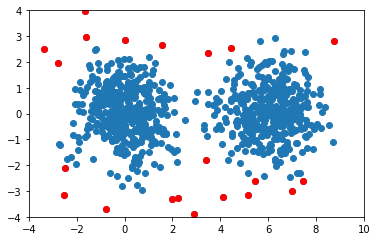

----------
----------
a: 0.2, k: 10, r: 0.2


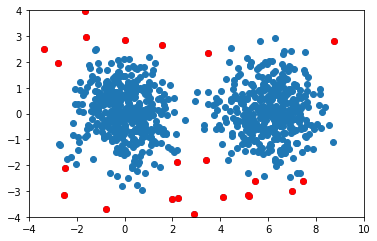

----------
a: 0.21, k: 5, r: 0.2


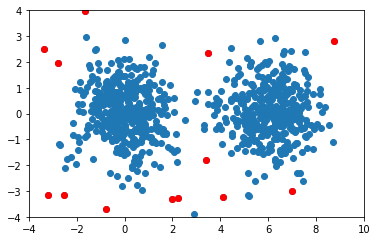

----------
----------
a: 0.22, k: 5, r: 0.2


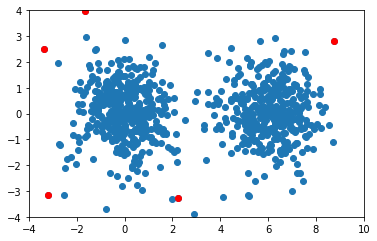

----------
a: 0.23, k: 5, r: 0.2


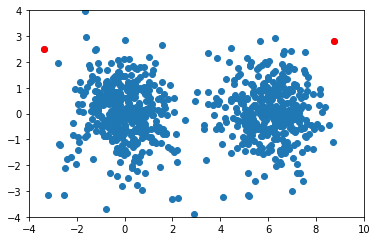

----------
----------
a: 0.24, k: 2, r: 0.2


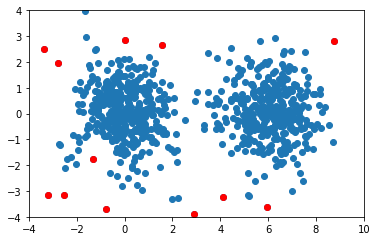

----------
a: 0.25, k: 2, r: 0.2


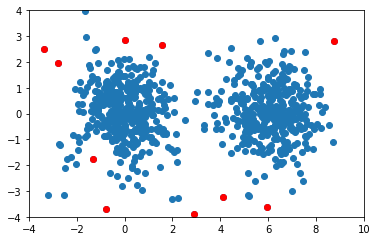

----------
----------
a: 0.26, k: 2, r: 0.2


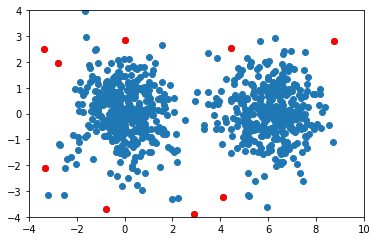

----------
a: 0.27, k: 5, r: 0.2


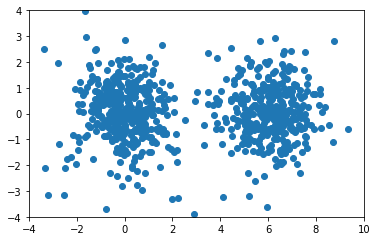

----------
----------
a: 0.28, k: 2, r: 0.2


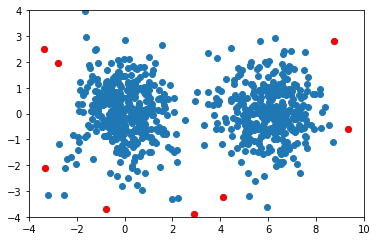

----------
a: 0.29, k: 2, r: 0.2


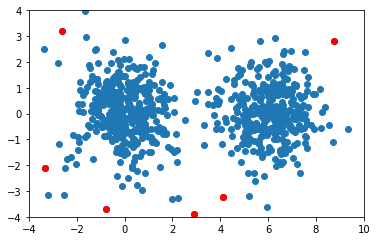

----------
----------
a: 0.3, k: 2, r: 0.2


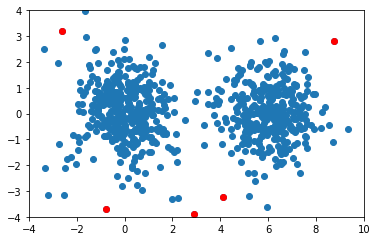

----------
a: 0.31, k: 2, r: 0.2


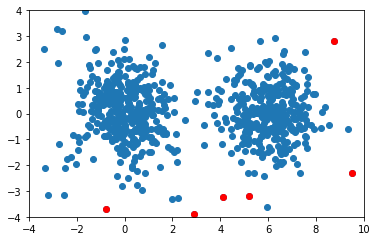

----------
----------
a: 0.32, k: 2, r: 0.2


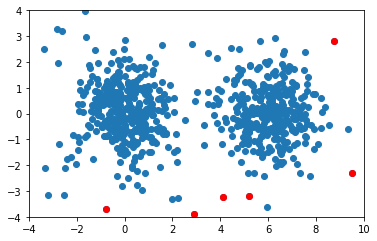

----------
a: 0.33, k: 2, r: 0.2


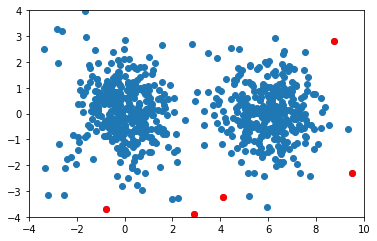

----------
----------
a: 0.34, k: 2, r: 0.2


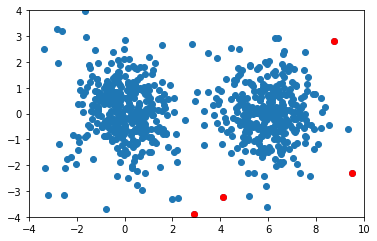

----------
a: 0.35, k: 2, r: 0.2


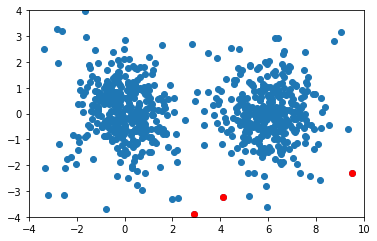

----------
----------
a: 0.36, k: 2, r: 0.2


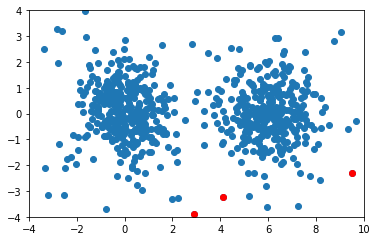

----------
a: 0.37, k: 2, r: 0.2


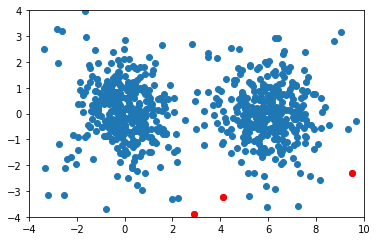

----------
----------
a: 0.38, k: 2, r: 0.2


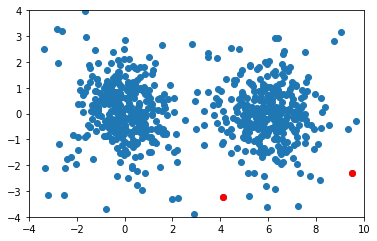

----------
a: 0.39, k: 2, r: 0.2


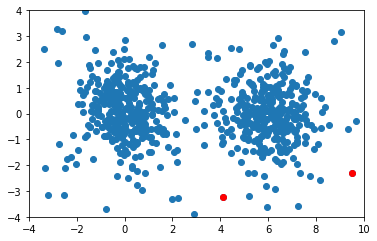

----------
----------
a: 0.4, k: 2, r: 0.2


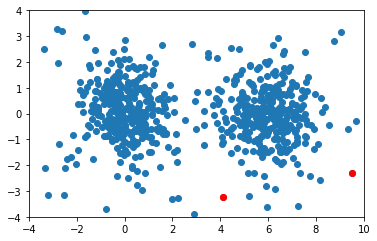

----------
a: 0.41, k: 2, r: 0.2


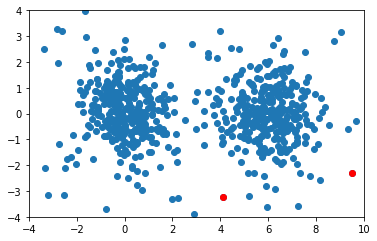

----------
----------
a: 0.42, k: 2, r: 0.2


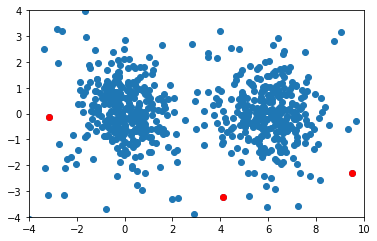

----------
a: 0.43, k: 2, r: 0.2


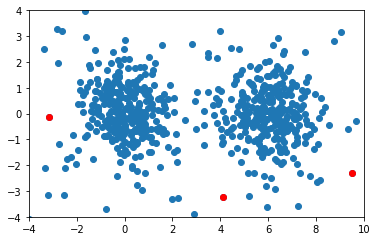

----------
----------
a: 0.44, k: 2, r: 0.2


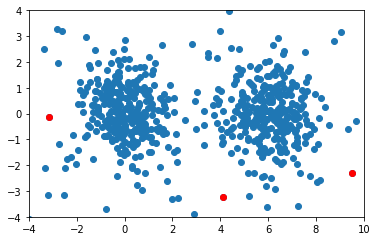

----------
a: 0.45, k: 2, r: 0.2


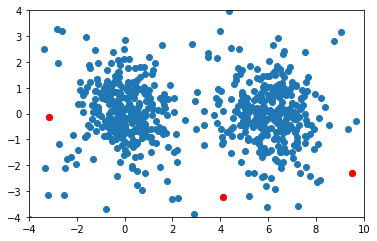

----------
----------
a: 0.46, k: 2, r: 0.2


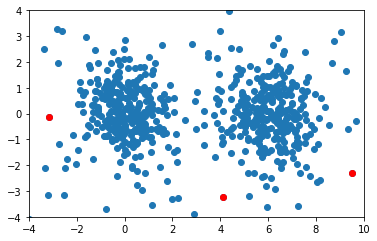

----------
a: 0.47, k: 2, r: 0.2


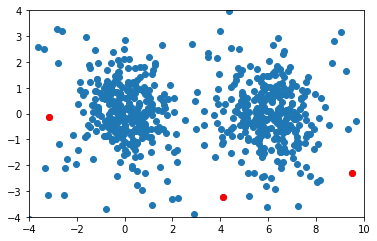

----------
----------
a: 0.48, k: 2, r: 0.2


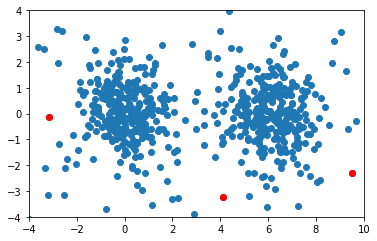

----------
a: 0.49, k: 2, r: 0.2


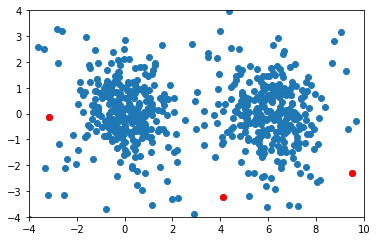

----------
----------
a: 0.5, k: 5, r: 0.2


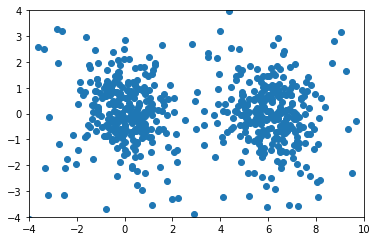

----------


In [3]:
for e, a in enumerate(np.arange(0.0, 0.51, 0.01)):
    seed = 1
    np.random.seed(seed)
    
    # Data
    m_train = 1000
    mean1 = [0, 0]
    cov1 = [[1, 0], [0, 1]]
    m_train1 = int((1 - a) / 2 * m_train)
    x_train1 = np.random.multivariate_normal(mean1, cov1, size=m_train1)
    mean2 = [6, 0]
    cov2 = [[1, 0], [0, 1]]
    m_train2 = int((1 - a) / 2 * m_train)
    x_train2 = np.random.multivariate_normal(mean2, cov2, size=m_train2)
    mean3 = [3, 0]
    cov3 = [[100, 0], [0, 100]]
    m_train3 = int(a * m_train)
    x_train3 = np.random.multivariate_normal(mean3, cov3, size=m_train3)
    x_train = np.concatenate((x_train1, x_train2, x_train3))

    global_k_lists = []
    global_metrics_list = []
    global_r_list = []
    for k in [2, 5, 10, 20, 50, 100, 200, 500]:
        nbrs = NearestNeighbors(n_neighbors=k, algorithm='brute').fit(x_train)
        distances, indices = nbrs.kneighbors(x_train)
        dist_k = np.max(distances, axis=1)

        global_r_min = func(x_train, dist_k)
        best_metrics, best_r = global_r_min

        global_k_lists.append(k)
        global_metrics_list.append(best_metrics)
        global_r_list.append(best_r)

    best_idx = np.argmin(global_metrics_list)
    global_best_k = global_k_lists[best_idx]
    global_best_r = global_r_list[best_idx]
    global_best_metrics = global_metrics_list[best_idx]

    print(f"a: {round(a, 2)}, k: {global_best_k}, r: {global_best_r}")

    plt.figure(figsize=(6, 3.8))
    nbrs = NearestNeighbors(n_neighbors=global_best_k, algorithm='brute').fit(x_train)
    distances, indices = nbrs.kneighbors(x_train)
    dist_k = np.max(distances, axis=1)
    threshold = np.quantile(dist_k, 1 - global_best_r)
    labels_pred = np.where(dist_k >= threshold, 1 ,0)    
    plt.scatter(x_train[:,0], x_train[:,1])
    plt.scatter(x_train[labels_pred==1,0], x_train[labels_pred==1,1], c="r")
    plt.xlim(-4, 10)
    plt.ylim(-4, 4)
    plt.show()

    if e % 2:
        print("-"*10)
        print("-"*10)
    else:
        print("-"*10)